# Construimos un algoritmo que arme una red según las especificaciones
En este caso será para una red con una sola capa oculta y con la posibilidad de escoger la funcion de activación de la capa oculta así como el número de nodos que tendrá. Los nodos de las capas de entrada y salida estarán definidos por los propios datos X,Y

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import floor

## Funciones de activación

In [111]:
#RELU
def relu(X):
    for i in range(0,len(X)):
        X[i]=max(0,X[i])
    return X
def drelu(X):
    for i in range(0,len(X)):
        if X[i]>=0: X[i]=1
        if X[i]<0: X[i]=0
    return X

#IDENTIDAD
def iden(X):
    return X
def diden(X):
    return 1

#SIGMOIDE
def sigmoid(X):
    return 1/(1+np.exp(-X))

def dsigmoid(X):
    return sigmoid(X)*(1-sigmoid(X))

#Definimos el forward propagation por si se quiere evaluar un determiado valor después de haber entrenado la red
def forward(X,W1,b1,W2,b2,activation=iden,dactivation=diden):
    z1=np.dot(X,W1)+b1
    a1=z1
    z2=np.dot(a1,W2)+b2
    a2=z2
    return a2




## Minibatch
Toma el conjunto de datos X, Y y los separa en dos grupos, los datos que seránusados para el entrenamiento, y los que serán usados como validación.

Se le indicará el porcentaje que queremos para validación

In [112]:
def batch(X,Y,porcent): #El porcentaje debe estar dado entre 0 y 1
    n=floor(porcent*len(X))
    index=random.sample(range(len(X)),n)
    X_learn=[]
    Y_learn=[]
    for i in index:
        X_learn.append(X[i])
        Y_learn.append(Y[i])
    X_val=np.delete(X,index, axis=0)
    Y_val=np.delete(Y,index, axis=0)
    
    X_learn=np.array(X_learn)
    Y_learn=np.array(Y_learn)
    
    return X_learn,Y_learn,X_val,Y_val


## Función de coste

In [113]:
#función de coste:
#iremos guardando los vaalores C=a_i-y_i en un arreglo para luego hacer la suma
def error(C):
    m=len(C)
    e=(1/(2*m))*np.linalg.norm(C)**2
    return e

## Neural Network

In [114]:
def neuralnet(X,Y,nodos,batch_size,learning_rate,epocas,activation,dactivation):
    #Definimos la estructura de la red
    n_entradas=len(X[0])
    n_salidas=len(Y[0])
    
    #definimos los conjuntos de aprendizaje y validación 
    X_learn,Y_learn,X_val,Y_val = batch(X,Y,batch_size)
    
    #forward
    W1=np.random.rand(n_entradas,nodos)
    W2=np.random.rand(nodos,n_salidas)
    b1=np.random.rand(nodos)
    b2=np.random.rand(n_salidas)
    
    z1=np.dot(X_learn,W1)+b1
    a1=activation(z1)
    z2=np.dot(a1,W2)+b2
    a2=z2
    
    #épocas
    errores=[]
    validacion=[]
    for i in range(epocas+1):
        #Forward
        z1=np.dot(X_learn,W1)+b1
        a1=activation(z1)
        z2=np.dot(a1,W2)+b2
        a2=z2
        
        #backpropagation
        delta2 = a2-Y_learn
        delta1 = (delta2).dot(W2.T)*dactivation(z1)
        
        errores.append(error(delta2)) #guardamos el error de cada época

        W2 -= learning_rate * a1.T.dot(delta2)
        b2 -= learning_rate * (delta2).sum(axis=0)

        W1 -= learning_rate * X_learn.T.dot(delta1)
        b1 -= learning_rate * (delta1).sum(axis=0)
        print("Época %d, coste %f" %(int(i),error(delta2)))
        
        #Ahora validamos el modelo
        z1=np.dot(X_val,W1)+b1
        a1=activation(z1)
        z2=np.dot(a1,W2)+b2
        a2=z2
        delta = a2-Y_val
        validacion.append(error(delta))
        
    plt.plot(range(i+1),errores,color='darkcyan',label='Aprendizaje')
    plt.plot(range(i+1),validacion,color='darkred',label='Validación')
    plt.grid()
    plt.legend()
    return W1,b1,W2,b2
        
        

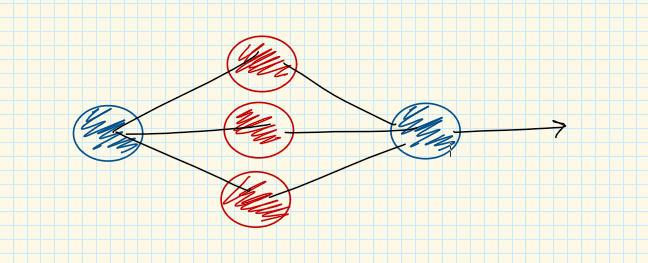

In [136]:
#Función a emular
def F(x):
    return 3*x

X=10*np.random.rand(100,1)
Y=[]
for x in X:
    y=F(x)
    y=y+np.random.uniform(-0.1,0.1)
    Y.append(y)
Y=np.array(Y)

Época 0, coste 149.941108
Época 1, coste 115.363145
Época 2, coste 55.764774
Época 3, coste 1.904202
Época 4, coste 0.588932
Época 5, coste 0.322184
Época 6, coste 0.155131
Época 7, coste 0.100863
Época 8, coste 0.073249
Época 9, coste 0.062318
Época 10, coste 0.056928
Época 11, coste 0.054310
Época 12, coste 0.052759
Época 13, coste 0.051699
Época 14, coste 0.050844
Época 15, coste 0.050085
Época 16, coste 0.049372
Época 17, coste 0.048683
Época 18, coste 0.048010
Época 19, coste 0.047350
Época 20, coste 0.046700
Época 21, coste 0.046060
Época 22, coste 0.045429
Época 23, coste 0.044806
Época 24, coste 0.044193
Época 25, coste 0.043588
Época 26, coste 0.042992
Época 27, coste 0.042404
Época 28, coste 0.041824
Época 29, coste 0.041253
Época 30, coste 0.040690


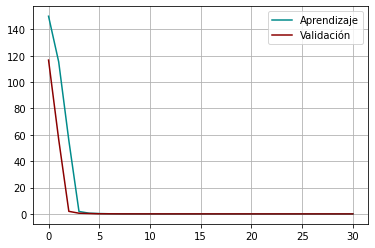

In [137]:
#neuralnet(X,Y,nodos,batch_size,learning_rate,epocas)

W1,b1,W2,b2=neuralnet(X,Y,1,0.8,0.0001,30,activation=iden,dactivation=diden)

In [139]:
#Probamos con un número para ver si arroja 3*x
forward([8],W1,b1,W2,b2,activation=iden,dactivation=diden)

array([23.89347057])

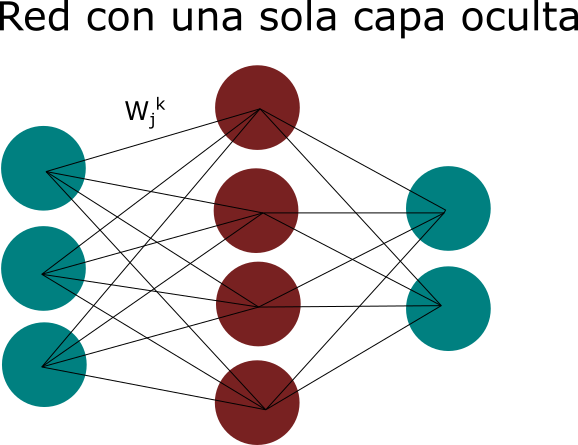

In [131]:
#Función a emular
def G(X):
    return [X[0]**2+X[1],X[0]+X[2]]

X = 10*np.random.rand(100,3)
Y=np.zeros((100,2))

for i,x in enumerate(X):
    img=G(X[i])
    img=img+2*np.random.rand(1,2)
    Y[i,:]=img
    

Época 0, coste 1099.901451
Época 1, coste 992.312781
Época 2, coste 902.276106
Época 3, coste 826.985716
Época 4, coste 764.074248
Época 5, coste 711.531584
Época 6, coste 667.654899
Época 7, coste 631.006390
Época 8, coste 600.373755
Época 9, coste 574.733053
Época 10, coste 553.212871
Época 11, coste 535.055831
Época 12, coste 519.565862
Época 13, coste 506.008425
Época 14, coste 493.424041
Época 15, coste 481.105859
Época 16, coste 469.841028
Época 17, coste 459.097565
Época 18, coste 447.566836
Época 19, coste 434.666221
Época 20, coste 424.488883
Época 21, coste 413.136628
Época 22, coste 399.401690
Época 23, coste 388.579502
Época 24, coste 376.853925
Época 25, coste 364.084606
Época 26, coste 351.264147
Época 27, coste 340.338529
Época 28, coste 331.979768
Época 29, coste 330.467451
Época 30, coste 316.106160
Época 31, coste 312.800581
Época 32, coste 302.466794
Época 33, coste 302.737775
Época 34, coste 288.852842
Época 35, coste 286.504840
Época 36, coste 275.935208
Época 37, 

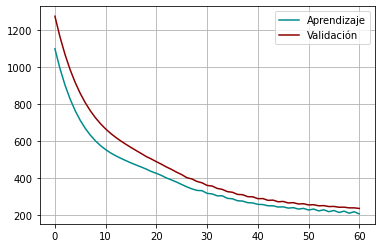

In [132]:
W1,b1,W2,b2=neuralnet(X,Y,10,0.8,0.0001,60,activation=sigmoid,dactivation=dsigmoid)

In [130]:
forward([1,2,3],W1,b1,W2,b2,activation=iden,dactivation=diden)

array([-56.84360094, -12.13020192])